In [88]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import sympy as sp
from sklearn.metrics import r2_score
from scipy.optimize import curve_fit
import scipy.stats as stats
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path
import scipy.stats as stats
import time
import os
from sklearn.metrics import r2_score

from scipy import signal
from scipy.signal import butter, sosfilt, sosfreqz

from SR830 import SR830


In [132]:
lockin = SR830("GPIB0::8::INSTR")

lockin.auto_scale()
lockin.get_medicion(isXY=True)
lockin.set_time_constant(10)

frecuencias = np.geomspace(200, 100000, 20)
medicion = []
nespera = 5
tespera = lockin.time_constant_values[lockin.time_constant] * nespera

for freq in frecuencias:
    lockin.set_referencia(isIntern=True, freq=freq, voltaje=0.5)
    lockin.auto_scale()

    medicion.append(lockin.get_medicion(isXY=True))
    time.sleep(tespera)
    print(f"Medición a {freq} Hz completada.")


Listo (r=2.36073e-05, scale=5e-05)
Listo (r=2.18415e-05, scale=5e-05)
Medición a 200.0 Hz completada.
Listo (r=2.16441e-05, scale=5e-05)
Medición a 277.38377130600577 Hz completada.
Listo (r=2.16627e-05, scale=5e-05)
Medición a 384.70878291971206 Hz completada.
Listo (r=2.17353e-05, scale=5e-05)
Medición a 533.5598653040655 Hz completada.
Listo (r=2.18527e-05, scale=5e-05)
Medición a 740.0042382778306 Hz completada.
Listo (r=2.21041e-05, scale=5e-05)
Medición a 1026.3258319796637 Hz completada.
Listo (r=2.25586e-05, scale=5e-05)
Medición a 1423.430649316464 Hz completada.
Listo (r=2.34266e-05, scale=5e-05)
Medición a 1974.1828084997844 Hz completada.
Listo (r=2.50005e-05, scale=5e-05)
Medición a 2738.0313633457613 Hz completada.
Listo (r=2.77964e-05, scale=5e-05)
Medición a 3797.427327594859 Hz completada.
Listo (r=3.25239e-05, scale=5e-05)
Medición a 5266.723566943739 Hz completada.
Listo (r=4.02464e-05, scale=5e-05)
Medición a 7304.518227125356 Hz completada.
Overloaded, subo escala 

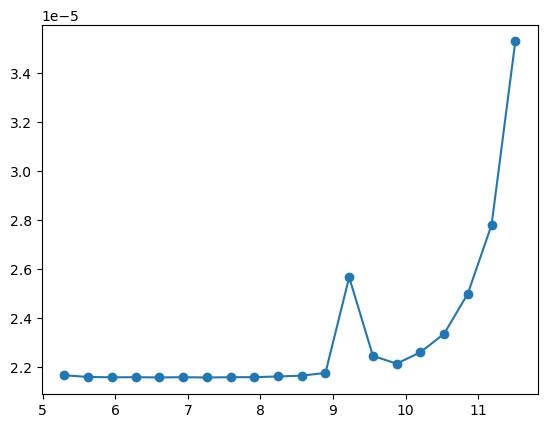

In [134]:
plt.plot(np.log(frecuencias), [np.abs(medicion[i][0]) for i in range(len(medicion))], 'o-')


In [135]:
medicion

[[2.16757e-05, 2.53321e-06],
 [2.16049e-05, 1.28151e-06],
 [2.15919e-05, 1.76207e-06],
 [2.15956e-05, 2.45871e-06],
 [2.15863e-05, 3.40679e-06],
 [2.15956e-05, 4.73301e-06],
 [2.15844e-05, 6.56958e-06],
 [2.15956e-05, 9.10467e-06],
 [2.15975e-05, 1.26213e-05],
 [2.16254e-05, 1.75164e-05],
 [2.1659e-05, 2.43318e-05],
 [2.17707e-05, 3.39469e-05],
 [2.56711e-05, 5.01166e-05],
 [2.24673e-05, 6.3472e-05],
 [2.2147e-05, 8.82191e-05],
 [2.26126e-05, 0.000127041],
 [2.33651e-05, 0.00017006],
 [2.50043e-05, 0.000244142],
 [2.78057e-05, 0.000326427],
 [3.52862e-05, 0.000452222]]

In [151]:
lockin = SR830("GPIB0::8::INSTR")

N = 10
voltaje = 0.5

lockin._lockin.write("OFLT 10")
lockin._lockin.write("OFSL 2")
lockin._lockin.write("SLVL {0:f}".format(voltaje))

waitt = lockin.time_constant_values[lockin.get_time_constant()] * 5

r0 = np.zeros(N)
tita = np.zeros(N)

freq = 1500

lockin._lockin.write("FMOD 1")
lockin._lockin.write("FREQ {0:f}".format(freq))
lockin.auto_scale()

for i in range(N):
    time.sleep(waitt)
    r0[i], tita[i] = lockin.auto_scale()


Listo (r=2.27616e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27542e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27393e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)
Listo (r=2.27467e-05, scale=0.0002)


In [152]:
V_0 = voltaje
R_res = 1000  # Ohm
V = np.mean(np.abs(r0))
R_cable = R_res / ((V_0/V)-1)

print(R_cable)
print(r0)

0.04549548974542309
[2.27467e-05 2.27542e-05 2.27467e-05 2.27467e-05 2.27393e-05 2.27467e-05
 2.27467e-05 2.27467e-05 2.27467e-05 2.27467e-05]


In [154]:
alpha_c = R_cable * ((0.0004)**2 * np.pi) / (0.85*2)
print(alpha_c)

1.3452074951123854e-08


In [128]:
lockin = SR830("GPIB0::8::INSTR")

N = 5
voltaje = 0.5

lockin._lockin.write("OFLT 9")
lockin._lockin.write("OFSL 2")
lockin._lockin.write("SLVL {0:f}".format(voltaje))

waitt = lockin.time_constant_values[lockin.get_time_constant()] * 5

r0 = np.array([])


freq = 1500

lockin._lockin.write("FMOD 1")
lockin._lockin.write("FREQ {0:f}".format(freq))
lockin.auto_scale()

for i in range(N):
    time.sleep(waitt)
    lockin.auto_scale()
    r0 = np.append(r0, lockin.get_medicion())

V_0 = voltaje
R_res = 1000  # Ohm
V = np.mean(np.abs(r0[0]))
R_cable = R_res / ((V_0/V)-1)

print(R_cable)

alpha_c = R_cable * ((0.00045)**2 * np.pi) / (0.85*2)
print(alpha_c)

Listo (r=2.27486e-05, scale=5e-05)
Listo (r=2.27505e-05, scale=5e-05)
Listo (r=2.27523e-05, scale=5e-05)
Listo (r=2.27281e-05, scale=5e-05)
Listo (r=2.27505e-05, scale=5e-05)
Listo (r=2.27486e-05, scale=5e-05)
0.0431744639538625
1.6156710119398046e-08
